# Функция интегральной экспоненты Ei и построение ее графиков

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.2 от 30.11.2024

Хабибуллин Ринат 2024 г.

---

In [1]:
"""
 импортируем библиотеки для расчетов
"""
import numpy as np
import matplotlib.pyplot as plt

# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sc
# sympy для символьных вычислений
import sympy as sp

Для расчета значений функции Ei в python можно использовать библиотеки `scipy.special` или `mpmath`.

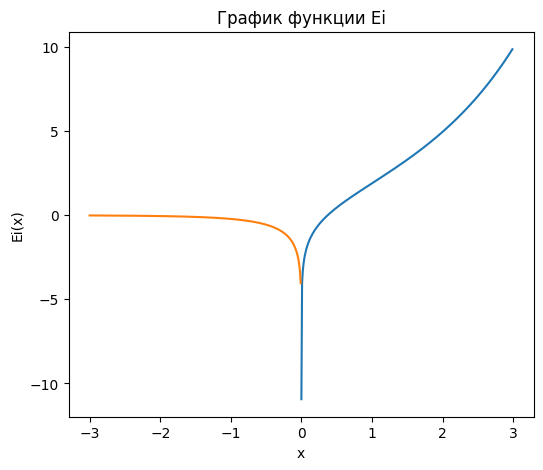

In [2]:
# для расчета интегральной экспоненты используем sc.expi
# построим ветки функции для положительных и отрицательных аргументов 
x = np.arange(1e-5,3,0.01)
x1 = np.arange(-3,-1e-5,0.01)

fig, (ax1) = plt.subplots(1, 1, figsize=(6,5))
plt.plot(x, sc.expi(x))
plt.plot(x1, sc.expi(x1))
plt.title("График функции Ei")
plt.xlabel("x")
plt.ylabel("Ei(x)")
plt.show()

Для нас практический интерес будет представлять часть графика для отрицательных значений около нуля (красная линия). Для этой области хорошо работает логарифмическая аппроксимация.

Для малых отрицательных значений аргумента можно получить
$$
Ei(-x) = \ln(x) + \gamma
$$

где $\gamma = 0.57721566481$ - константа Эйлера

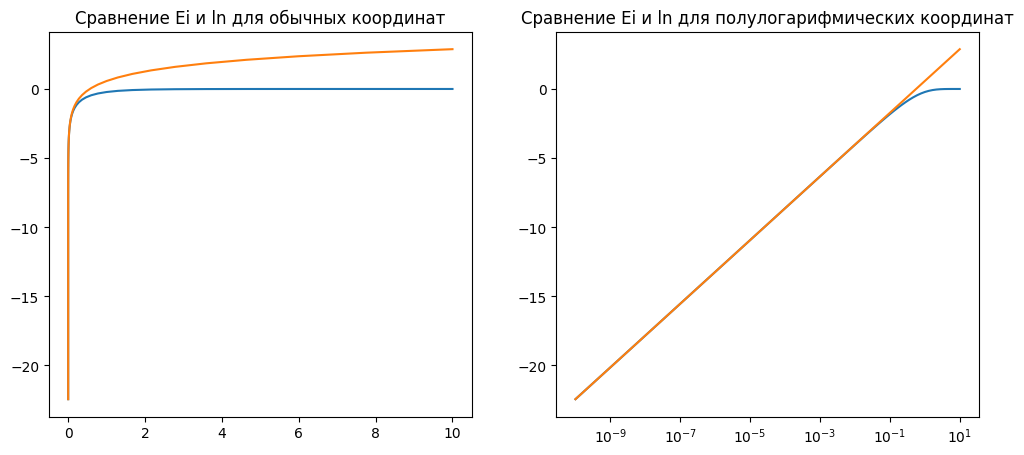

In [3]:
# зададим логарифмическое распределение точек вблизи нуля для построения графика
x = np.logspace(-10, 1, 100)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(x, sc.expi(-x))
ax1.plot(x, np.log(x) + 0.57721566481)
ax1.set_title('Сравнение Ei и ln для обычных координат')

ax2.plot(x, sc.expi(-x))
ax2.plot(x, np.log(x)  + 0.57721566481)
ax2.set_xscale('log')
ax2.set_title('Сравнение Ei и ln для полулогарифмических координат')

plt.show()

Задавшить определенной точностью для константы Эйлера $\gamma$ (мы взяли около 10 значащих знаков после запятой) - можно построить зависимость ошибки аппроксимации функции $Ei$ при помощи $\ln$. Удобнее отобразить эту зависимость в двойных логарифмических координатах. По ней можно определить до какого значения аргумента - ошибка будет лежать в желаемом диапазоне.

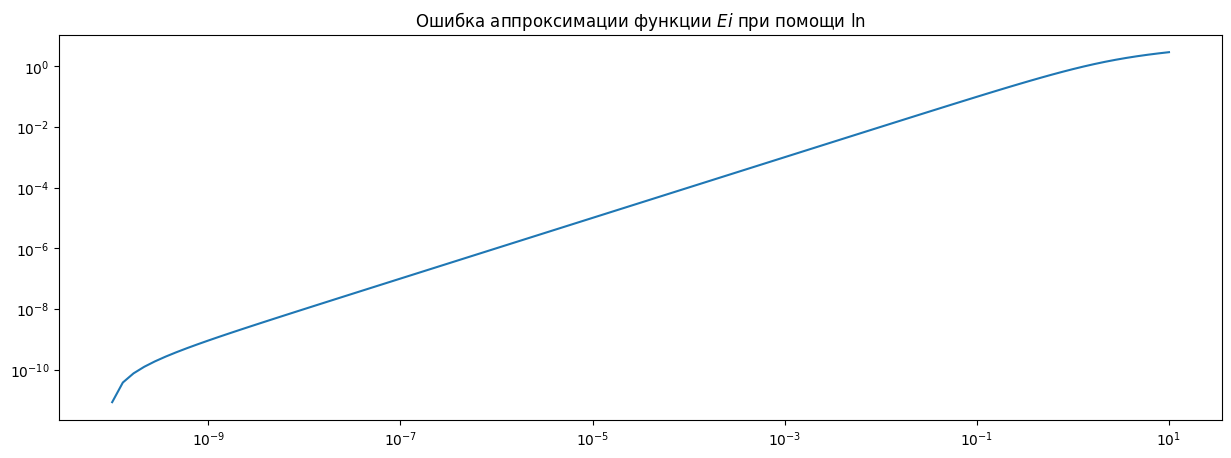

величина аргумента x = 1.01e-05 дает ошибку аппроксимации около 1.0099882965519669e-05


In [4]:
x = np.logspace(-10, 1, 100)

fig, (ax1) = plt.subplots(1, 1, figsize=(15,5))
ax1.plot(x, np.log(x) + 0.57721566481 - sc.expi(-x))
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_ylim(1e-20, 1)
ax1.set_title(r'Ошибка аппроксимации функции $Ei$ при помощи $\ln$')

x = 1.01e-5
plt.show()
print('величина аргумента x = {} дает ошибку аппроксимации около {}'.format(x, np.log(x) + 0.57721566481 - sc.expi(-x)))

# Решение линейного стока (с использованием Ei)

Уравнение фильтрации для радиального потока в линеаризованном виде можно записать в виде

\begin{equation} 
\frac{\partial p}{\partial t} = 0.00036 \dfrac{k}{\phi \mu c_t} \dfrac{1}{r} \left[ \dfrac{\partial}{\partial r} \left( r \dfrac{ \partial p} {\partial r} \right) \right]  
\end{equation}

Напомним, здесь

* $p$ - давление, атм

* $t$ - время, час

* $k$ - проницаемость в направлении движения потока, мД

* $\mu$ - динамическая вязкость, сП

* $\phi$ - пористость, д.е.

* $c_t$ - сжимаемость, 1/атм

* $r$ - расстояние от центра, м

Часто для анализа уравнений неустановившейся фильтрации используются безразмерные переменные. Мы будем использовать переменные в виде:

$$ r_D = \frac{r}{r_w}  $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}  $$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right)   $$

Здесь использование единицы измерения СИ.

* $r_w$ - радиус скважины, м

* $r$ - расстояние от центра скважины до точки в пласте, м

* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут

* $\phi$ - пористость, доли единиц

* $\mu$ - вязкость нефти в пласте, сП

* $B$ - объемный коэффициент нефти, м3/м3

* $p_i$ - начальное давление в пласте, атм

* $p$ - давление на расстоянии $r$, атм

* $c_t$ - общая сжимаемость системы в пласте, 1/атм

Использование безразмерных переменных позволяет упростить уравнение фильтрации, которое примет вид

\begin{equation}  
\frac{\partial p_D}{ \partial t_D} = \dfrac{1}{r_D} \left[ \dfrac{\partial}{\partial r_D} \left( r_D \dfrac{ \partial p_D} {\partial r_D} \right) \right] 
\end{equation} 

Решение этого уравнения - функция безразмерного давления от безразмерных времени и расстояния $p_D(r_D, t_D) $

Для решения уравнения фильтрации - линейного дифференциального уравнения в частных производных второго порядка необходимо задать начальные и граничные условия.
Самое простое решение можно получить для случая вертикальной скважины бесконечно малого радиуса запускающейся с постоянным дебитом. Условия соответствующие этому случаю можно выразить следующим образом

* начальное условие. До запуска скважины в момент времени  $t_D = 0$ давление в пласте равно начальному во всех точках $p=p_i$
$$ t_D < 0, p_D = 0 $$

* условие постоянства дебита на скважине - граничное условие на скважине
$$ \lim_{r_D \to 0} {r_D \frac{\partial p_D}{\partial r_D}} = -1  $$

* условие на бесконечном расстоянии возмущения от скважине нет
$$ r_D = \infty, p_D = 0  $$

В этом случае решение может быть выражено через функцию интегральной экспоненты
\begin{equation}  
p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)
\end{equation} 

где -Ei(-x) - интегральная показательная функция.

Решение в размерных переменных можно записать как
\begin{equation} 
p\left(r,t\right)=p_i-\frac{18.41q_sB\mu}{kh}\left(-\frac{1}{2} Ei \left(-\frac{\varphi\mu c_tr^2}{0.00144kt}\right)\right) 
\end{equation} 

In [5]:
"""
Решение линейного стока уравнения фильтрации
"""
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)

## Построение графиков решения в безразмерных координатах 

Пример показывает как построить распределение давления для заданного момента времени. Помните, что тут безразмерное давление и время. Для построения графика используется логарифмическое распределение значений расстояния, так как около нуля требуется больше точек для отображения из за значительного изменения функции.

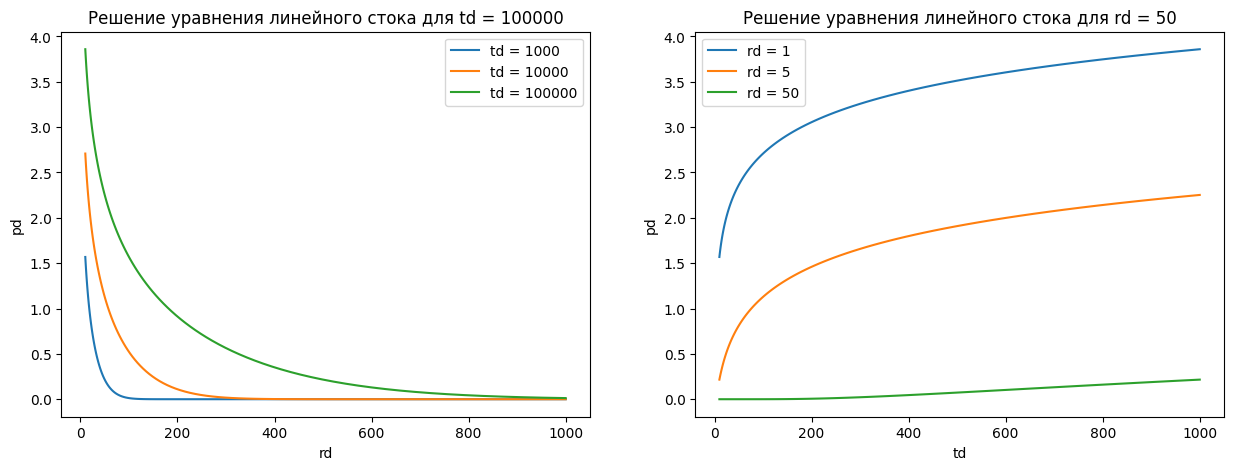

In [6]:
"""
построим графики решения линейного стока
в безразмерных переменных
"""
rd_arr = np.logspace(1, 3, 100)
td_arr = np.logspace(1, 3, 100)

# при построении используем векторный расчет
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for td in [1000, 10000, 100000]:
    ax1.plot(rd_arr, pd_ei(td, rd_arr), label=f"td = {td}" )
ax1.set_title("Решение уравнения линейного стока для td = {}".format(td))
ax1.set_xlabel("rd")
ax1.set_ylabel("pd")
ax1.legend()

for rd in (1, 5 , 50):
    ax2.plot(td_arr, pd_ei(td_arr, rd), label=f"rd = {rd}" )
ax2.set_title("Решение уравнения линейного стока для rd = {}".format(rd))
ax2.set_xlabel("td")
ax2.set_ylabel("pd")
ax2.legend()
plt.show()

 ## Построение графиков решения в размерных координатах
 Для расчетов в размерных переменных необходимо определить функции перевода размерных координаты в безразмерные и обратно. В целом расчеты станут более громоздкие.

In [7]:
"""
 определим функции для перевода размерных переменных в безразмерные и обратно
 пригодится для построения графиков и ведения расчетов

 при наименовании функций придерживаемся следующих соглашений
 сначала идет название того, что считаем
 в конце указывается размерность результата, если это уместно
"""
def r_from_rd_m(rd, rw_m=0.1):
    """
    перевод безразмерного расстояния в размерное
    rd -  безразмерное расстояние
    rw_m -  радиус скважины, м
    """
    return rd*rw_m

def rd_from_r(r_m, rw_m=0.1):
    """
    перевод размерного расстояния в безразмерное
    r_m - размерное расстояние, м
    rw_m - радиус скважины, м
    """
    return r_m/rw_m

def t_from_td_hr(td, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод безразмерного времени в размерное, результат в часах
    td - безразмерное время
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return td * phi * mu_cP * ct_1atm * rw_m * rw_m / k_mD / 0.00036

def td_from_t(t_hr, k_mD=10, phi=0.2, mu_cP=1, ct_1atm=1e-5, rw_m=0.1):
    """
    перевод размерного времени в безразмерное
    t_hr - размерное время, час
    k_mD - проницаемость пласта, мД
    phi - пористость, доли единиц
    mu_cP - динамическая вязкость флюида, сП
    ct_1atm - общая сжимаемость, 1/атм
    rw_m - радиус скважины, м
    """
    return  0.00036 * t_hr * k_mD / (phi * mu_cP * ct_1atm * rw_m * rw_m) 

def p_from_pd_atma(pd, 
                   k_mD=10, h_m=10, 
                   q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод безразмерного давления в размерное, результат 
    в абсолютных атмосферах
    pd - безразмерное давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return pi_atma - pd * 18.41 * q_sm3day * b_m3m3 * mu_cP / k_mD / h_m 

def pd_from_p(p_atma, 
              k_mD=10, h_m=10, 
              q_sm3day=20, b_m3m3=1.2, mu_cP=1, pi_atma=250):
    """
    перевод размерного давления в безразмерное
    p_atma - давление
    k_mD - проницаемость пласта, мД
    h_m - мощность пласта, м
    q_sm3day - дебит на поверхности, м3/сут в с.у.
    fvf_m3m3 - объемный коэффициент нефти, м3/м3
    mu_cP - динамическая вязкость флюида, сП
    pi_atma - начальное давление, абсолютные атм.
    """
    return (pi_atma - p_atma) / (18.41*q_sm3day*b_m3m3*mu_cP) * k_mD * h_m 

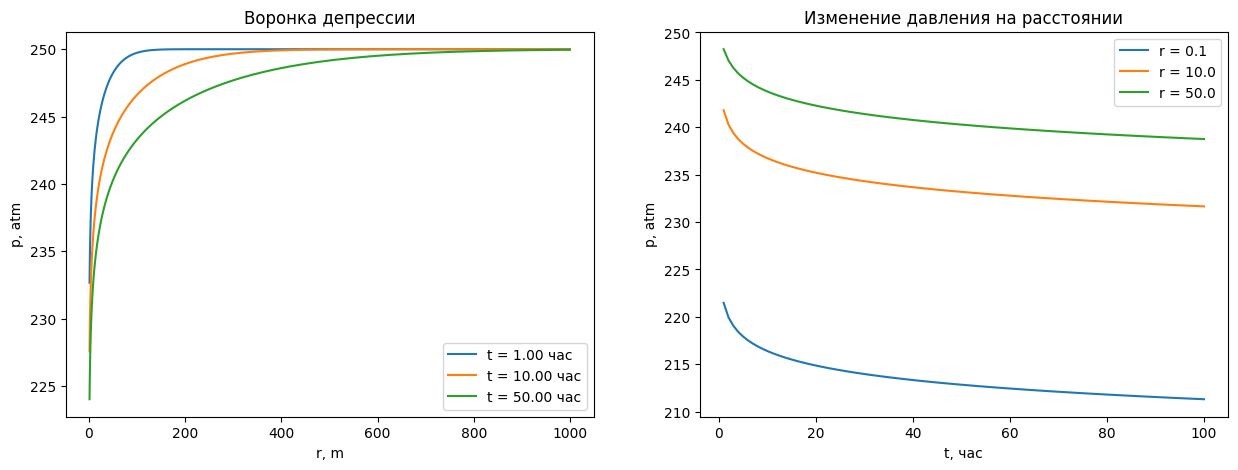

In [8]:
"""
Построим графики распределения давления и изменения давления
в размерных координатах
"""
# исходные данные для построения графиков
h_m=10 
q_sm3day=20 
b_m3m3=1.2 
mu_cP=1 
pi_atma=250
rw_m=0.1
k_mD=10, 
phi=0.2
ct_1atm=1e-5

r_arr = np.logspace(0.1, 3, 100)
rd_arr = rd_from_r(r_arr, rw_m=rw_m)
t_arr = np.linspace(1, 100, 100)
td_arr = td_from_t(t_arr, 
                   k_mD=k_mD, 
                   phi=phi, 
                   mu_cP=mu_cP, 
                   ct_1atm=ct_1atm, 
                   rw_m=rw_m)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

for td in td_from_t(np.array([1, 10, 50]), 
                    k_mD=k_mD, 
                    phi=phi, 
                    mu_cP=mu_cP, 
                    ct_1atm=ct_1atm, 
                    rw_m=rw_m):
    ax1.plot(r_arr, 
             p_from_pd_atma(pd=pd_ei(td,rd_arr), 
                            h_m=h_m, 
                            q_sm3day=q_sm3day, 
                            b_m3m3=b_m3m3, 
                            mu_cP=mu_cP, 
                            pi_atma=pi_atma),
             label=f"t = {t_from_td_hr(td, 
                                       k_mD=k_mD, 
                                       phi=phi, 
                                       mu_cP=mu_cP, 
                                       ct_1atm=ct_1atm, 
                                       rw_m=rw_m)[0]:.2f} час")
ax1.set_title("Воронка депрессии")
ax1.set_xlabel("r, m")
ax1.set_ylabel("p, atm")
ax1.legend()

for rd in rd_from_r(np.array([rw_m, 10, 50])):
    ax2.plot(t_arr, 
             p_from_pd_atma(pd=pd_ei(td_arr, rd), 
                            h_m=h_m, 
                            q_sm3day=q_sm3day, 
                            b_m3m3=b_m3m3, 
                            mu_cP=mu_cP, 
                            pi_atma=pi_atma),
             label=f"r = {r_from_rd_m(rd, rw_m=rw_m)}" )
ax2.set_title("Изменение давления на расстоянии")
ax2.set_xlabel("t, час")
ax2.set_ylabel("p, atm")
ax2.legend()

plt.show()

##  Задания для самостоятельной работы 

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте графики зависимости забойного давления от времени в полулогарифмических координатах

2. Сравните графики распределения давления вокруг скважины с использованием стационарного решения и решения линейного стока

3. Постройте график распределения давления в пласте для композитного пласта. В композитном пласте на расстоянии $r<r_1$ проницаемость равна $k=k_1$, а для $r>=r_1$, $k=k_2$. Как будет меняться воронка депрессии в таком пласте со временем?

4. Постройте двумерную тепловую карту распределения давления в пласте для моделей однородного пласта и композитного пласта. 

5. Постройте график зависимости радиуса влияния скважины от времени.

# Использование sympy

In [9]:
# объявим символьные переменные
r_d, p_d, t_d, gamma = sp.symbols('r_d p_d t_d gamma')
r, p, t, q, b, mu, phi, ct, k, h, p_i, s, r_w = sp.symbols('r p t q b mu phi ct k h p_i s r_w')

In [10]:
# зададим исходное уравнение
eq1 = sp.Eq(p_d, -1/2*sp.Ei(-r_d**2/4 / t_d))
eq1

Eq(p_d, -0.5*Ei(-r_d**2/(4*t_d)))

решение с интегральной экспонентой можно задать используя `scipy.special` или сгенерировать из решения `sympy`

In [11]:
pd_ei_ = sp.lambdify([t_d, r_d],eq1.rhs, modules=["scipy","numpy"]) 

сравним решения заданные явно и сгенерированные из решения `sympy`

In [12]:
print(pd_ei(1000,1))
print(pd_ei_(1000,1))
print(pd_ei(1000,1)==pd_ei_(1000,1))

3.8585419797881815
3.8585419797881815
True


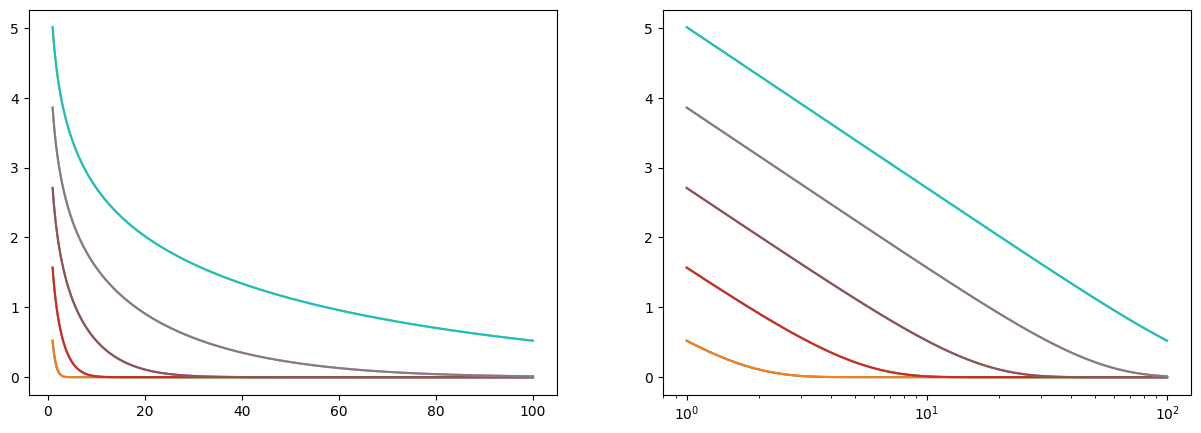

In [13]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

rd_arr = np.logspace(0,2,100)
for td in [1, 10, 100, 1000, 10000]:
    ax1.plot(rd_arr, pd_ei_(td, rd_arr))
    ax1.plot(rd_arr, pd_ei(td, rd_arr))

rd_arr = np.logspace(0,2,100)
for td in [1, 10, 100, 1000, 10000]:
    ax2.plot(rd_arr, pd_ei_(td, rd_arr))
    ax2.plot(rd_arr, pd_ei(td, rd_arr))
ax2.set_xscale('log')

Связь размерных и безразмерных переменных задается в виде

$$ r_D = \frac{r}{r_w} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2} $$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right) $$

Здесь использование единицы измерения СИ.

* $r_w$ - радиус скважины, м

* $r$ - расстояние от центра скважины до точки в пласте, м

* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут

* $\phi$ - пористость, доли единиц

* $\mu$ - вязкость нефти в пласте, сП

* $B$ - объемный коэффициент нефти, м3/м3

* $p_i$ - начальное давление в пласте, атм

* $p$ - давление на расстоянии $r$, атм

* $c_t$ - общая сжимаемость системы в пласте, 1/атм

In [14]:
# подставим вместо безразмерных переменных размерные
eq2 = eq1.subs(r_d, r/r_w)
eq2 = eq2.subs(t_d, 0.00036*k*t/(phi*mu*ct*r_w**2))
eq2 = eq2.subs(p_d, k*h/(18.41*q*b*mu)*(p_i-p))
# решим полученное уравнение относительно перепада давления
eq3 = sp.solve(eq2,p_i-p)
# выведем первое решение
eq3[0]

-9.205*b*mu*q*Ei(-694.444444444444*ct*mu*phi*r**2/(k*t))/(h*k)

Решение в размерных переменных можно записать как
$$
p\left(r,t\right)=p_i-\frac{18.41q_sB\mu}{kh}\left(-\frac{1}{2} Ei \left(-\frac{\varphi\mu c_tr^2}{0.00144kt}\right)\right) 
$$



In [15]:
# проверим,что констранта под интегральной экспонентой одна и та же :)
print(1/0.00144)

694.4444444444445


In [16]:
# сгенерируем решение
pd_ei_full_ = sp.lambdify([t, r, k, h, mu, ct, phi, q, b, p_i],p_i-eq3[0], 
                          modules=["scipy","numpy"]) 

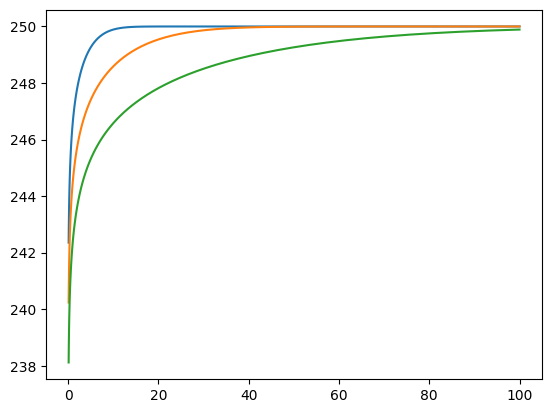

In [17]:
# нарисуем воронку депрессии используя сгенерированное решение
r_arr = np.logspace(-1,2,100)
for tt in [0.1, 1, 10]:
    plt.plot(r_arr, 
             pd_ei_full_(tt, r_arr, 
                         k=10, h=10, mu=1, ct=1e-4, phi=0.2, q=10, b=1, p_i=250))


Решение с интегральной экспонентой может быть заменено приблеженным решением с использованием логарифма 

$$ 
p_D(r_D,t_D) = - \frac{1}{2} \ln \left( \dfrac{ r_D^2}{4t_d} \right) - \frac{1}{2}\gamma 
$$

где $\gamma = 0.57721566481$ - константа Эйлера

на графике от времени в полулогарифмических координатах логарифмическое приближение выглядит как кривая с наклоном $0.5$

упростим последнее выражение с использованием `sympy`

In [18]:
# зададим исходное уравнение
eq = sp.Eq(p_d, -1/2*sp.ln(r_d**2/4 / t_d) -1/2*gamma)

In [19]:
# объявим символьные переменные
r_d, p_d, t_d, gamma = sp.symbols('r_d p_d t_d gamma')
r, p, t, q, b, mu, phi, ct, k, h, p_i, s, r_w = sp.symbols('r p t q b mu phi ct k h p_i s r_w')

# зададим исходное уравнение
eq = sp.Eq(p_d, -1/2*sp.ln(r_d**2/4 / t_d) -1/2*gamma)

print('Исходное уравнение - логарифмическое приближение решения линейного стока')
display(eq)


Исходное уравнение - логарифмическое приближение решения линейного стока


Eq(p_d, -0.5*gamma - 0.5*log(r_d**2/(4*t_d)))

In [20]:
# подставим значение для gamma
eq = sp.simplify(sp.expand(eq.subs(gamma, 0.57721566)))
eq

Eq(p_d, 0.404539350559945 - 0.5*log(r_d**2/t_d))

In [21]:
pd_ei_ln_ = sp.lambdify([t_d, r_d],eq.rhs, modules=["scipy","numpy"]) 

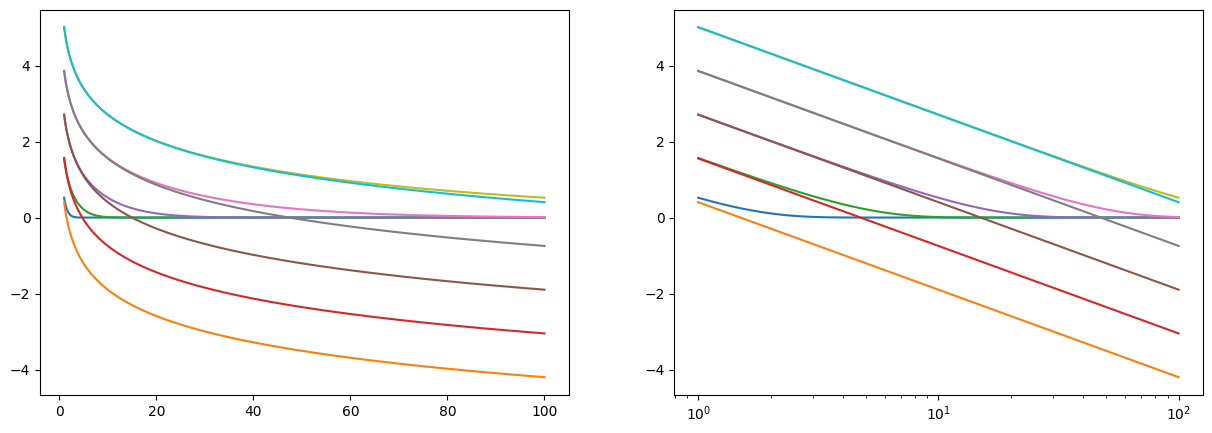

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

rd_arr = np.logspace(0,2,100)
for td_ in [1, 10, 100, 1000, 10000]:
    ax1.plot(rd_arr, pd_ei_(td_, rd_arr))
    ax1.plot(rd_arr, pd_ei_ln_(td_, rd_arr))

rd_arr = np.logspace(0,2,100)
for td_ in [1, 10, 100, 1000, 10000]:
    ax2.plot(rd_arr, pd_ei_(td_, rd_arr))
    ax2.plot(rd_arr, pd_ei_ln_(td_, rd_arr))
ax2.set_xscale('log')

In [23]:
# подставим вместо безразмерных переменных размерные
eq = eq.subs(r_d, r/r_w)
eq = eq.subs(t_d, 0.00036*k*t/(phi*mu*ct*r_w**2))
eq = eq.subs(p_d, k*h/(18.41*q*b*mu)*(p_i-p))
# решим полученное уравнение относительно перепада давления
eq1 = sp.solve(eq,p_i-p)
# выведем первое решение
eq1[0]

9.205e-14*b*mu*q*(80907870111989.0 - 100000000000000.0*log(2777.77777777778*ct*mu*phi*r**2/(k*t)))/(h*k)

In [24]:
eq5 = sp.simplify(sp.expand(eq1[0]))
display(eq5)

b*mu*q*(-9.205*log(ct*mu*phi*r**2/(k*t)) - 65.5426176327539)/(h*k)

## Задания для самостоятельной работы 

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте графики сравнение решения линейного стока и логарифмического приближения решения в размерных координатах
2. Постройте решение для линейного источника на плоскости проинтегрировав точечное решение по координате. Постройте поле давления для такого источника. Считайте дебит линейного источника известным.

# Расчет кривой восстановления давления

Один из самых простых примеров применения суперпозиции. Предполагаем, что добывающая скважина в однородном изотропном пласте запускается в момент времени `t=0` и работает `t_p_hr` часов, после чего останавливается. После остановки скважины забойное давление растет - и мы получим кривую восстановления давления.

Пусть решение задачи запуска скважины (падения давления) будет $P_D(t_D, r_D)$. Тогда решение для изменения давления при запуске и последующей остановки скважины можно представить в виде 
\begin{equation}
P_{bu.D}(t_D, t_{prod.D}, r_D) = P_D(t_D) - P_D(t_D-t_{prod.D}, r_D) \cdot \mathcal{H}(t_D-t_{prod.D})
\end{equation}

где

* $t_D$ - безразмерное время после запуска скважины,

* $t_{prod.D}$ - безразмерное время работы скважины после запуска

* $\mathcal{H}$ - ступенчатая [функция Хевисайда](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0) (в некоторых книгах обозначается как $\theta$)

* $P_D(t_D, r_D)$ - безразмерное давление - решение задачи запуска скважины (падения давления)

* $P_{bu.D}(t_D, t_{prod.D}, r_D)$ - безразмерное давление- решение задачи запуска скважины и последующей остановки скважины

Для проведения векторных расчетов в python удобно выражение с использованием функции Хевисайда

$$ \mathcal{H} = \begin{cases}0 & x < 0\\1 & x = 0\\1 & x > 0\end{cases}$$

Применение функции Хевисайда позволяет избежать в расчетных функциях применение условных операторов в явном виде для отдельных элементов входных массивов. Это потенциально ускоряет расчет. 


In [25]:
def pd_build_up(td, td_p, rd):
    """
    расчет давления для запуска и последующей остановки скважины
    td - время после запуска
    td_p - время безразмерное - которое скважина работала до остановки
    rd - расстояния от скважины
    """
    # применение функции Хевисайда здесь делает расчет корректным
    # для входных векторов td
    return pd_ei(td, rd) - np.heaviside(td-td_p,1) * pd_ei(td-td_p, rd)

время работы скважины 24.00 часа, что соответсвует безразмерному времени 4320000.00


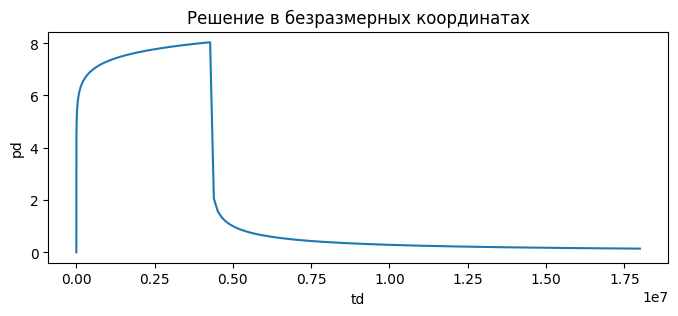

In [26]:
t_arr = np.logspace(-10, 2, 1000)
t_prod_hr = 24
k = 10   # проницаемость
q = 30   # дебит

# переведем размерный массив времени в безразмерные величины
# некоторые параметры можно было бы пропустить и оставить значения по умолчанию
# но для полноты приведем их в явном виде

td_arr = td_from_t(t_arr, 
                   k_mD=k, phi=0.2, mu_cP=1, ct_1atm=1e-05, rw_m=0.1)
td_prod = td_from_t(t_prod_hr, 
                    k_mD=k, phi=0.2, mu_cP=1, ct_1atm=1e-05, rw_m=0.1)

print('время работы скважины {:.2f} часа, что соответсвует безразмерному времени {:.2f}'.format(t_prod_hr, td_prod))

# для заданного массива безразмерных времен рассчитаем безразмерные давления
pd_arr = pd_build_up(td_arr, td_prod, rd=1)

# построение графика
plt.rcParams["figure.figsize"] = (8,3)

plt.plot(td_arr, pd_arr)

plt.xlabel('td')
plt.ylabel('pd')
plt.title('Решение в безразмерных координатах')
plt.show()

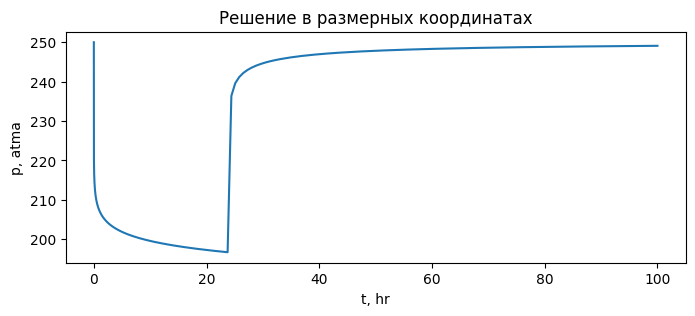

In [27]:
# переведем безразмерные координаты в размерные
p_arr = p_from_pd_atma(pd_arr, 
                       k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250)

plt.rcParams["figure.figsize"] = (8,3)
plt.plot(t_arr, p_arr)
plt.xlabel('t, hr')
plt.ylabel('p, atma')
plt.title('Решение в размерных координатах')
plt.show()

## Построение графиков распределения давления в пласте при восстановлении давления 

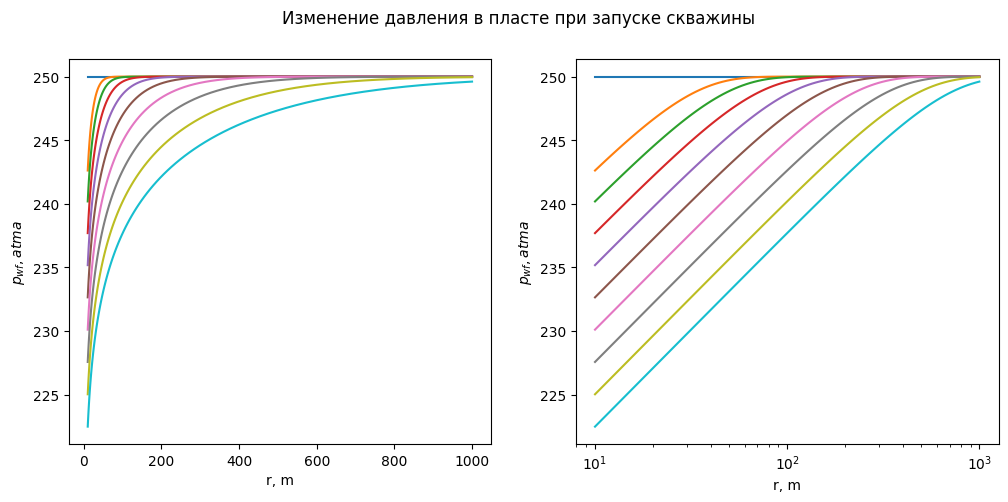

In [28]:
r_arr = np.logspace(1, 3, 100)
t_arr = np.logspace(-1, 2, 10)
t_arr[0] = 0.001
t_prod = 100

tv, rv = np.meshgrid(td_from_t(t_arr),rd_from_r(r_arr))
pd_arr =pd_ei(tv, rd=rv)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12,5])
fig.suptitle('Изменение давления в пласте при запуске скважины')
ax1.plot(r_arr, 
         p_from_pd_atma(pd_arr, 
                        k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, 
                        pi_atma=250))
ax1.set_label(t_arr)
ax1.set_xlabel('r, m')
ax1.set_ylabel('$p_{wf}, atma$')

ax2.plot(r_arr,
         p_from_pd_atma(pd_arr, 
                        k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, 
                        pi_atma=250))
ax2.set_xscale('log')
ax2.set_xlabel('r, m')
ax2.set_ylabel('$p_{wf}, atma$')
plt.show()

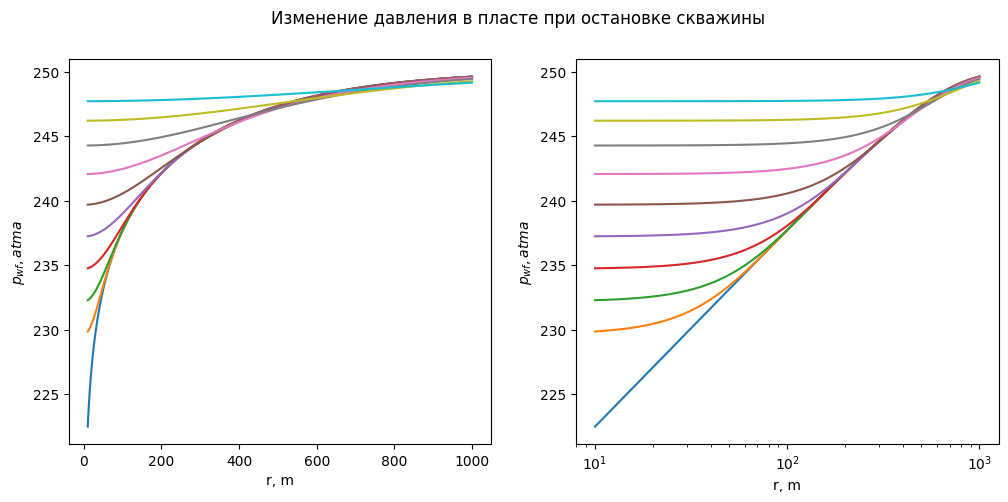

In [29]:
pd_arr_bu =pd_ei(tv + td_from_t(t_prod), rd=rv) - pd_ei(tv, rd=rv)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12,5])
fig.suptitle('Изменение давления в пласте при остановке скважины')
ax1.plot(r_arr, 
         p_from_pd_atma(pd_arr_bu, 
                        k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, 
                        pi_atma=250))
ax1.set_label(t_arr)
ax1.set_xlabel('r, m')
ax1.set_ylabel('$p_{wf}, atma$')

ax2.plot(r_arr,
         p_from_pd_atma(pd_arr_bu, 
                        k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, 
                        pi_atma=250))
ax2.set_xscale('log')
ax2.set_xlabel('r, m')
ax2.set_ylabel('$p_{wf}, atma$')
plt.show()

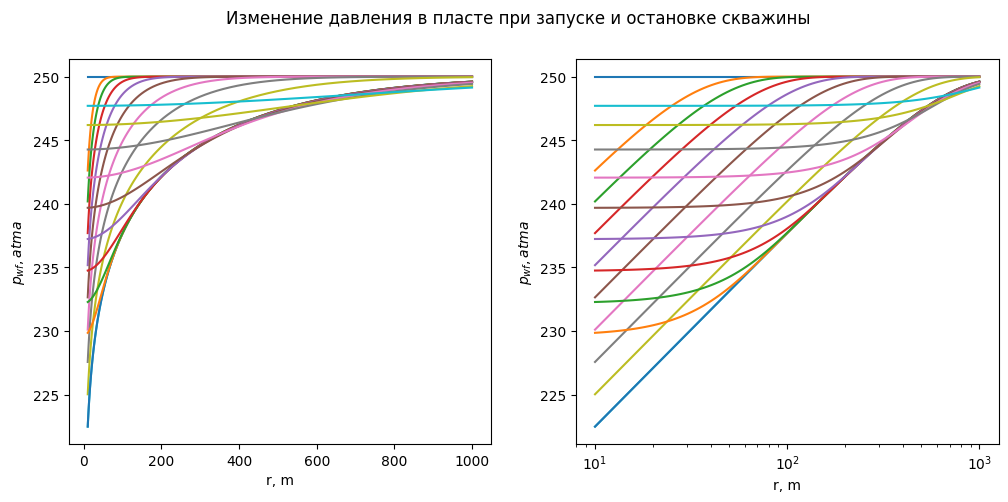

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12,5])
fig.suptitle('Изменение давления в пласте при запуске и остановке скважины')
ax1.plot(r_arr,
         p_from_pd_atma(pd_arr, 
                        k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, 
                        pi_atma=250))
ax1.plot(r_arr,
         p_from_pd_atma(pd_arr_bu, 
                        k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, 
                        pi_atma=250))
ax1.set_label(t_arr)
ax1.set_xlabel('r, m')
ax1.set_ylabel('$p_{wf}, atma$')
ax2.plot(r_arr,
         p_from_pd_atma(pd_arr, 
                        k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, 
                        pi_atma=250))
ax2.plot(r_arr,
         p_from_pd_atma(pd_arr_bu, 
                        k_mD=k, q_sm3day=q, h_m=10, b_m3m3=1.2, mu_cP=1, 
                        pi_atma=250))

ax2.set_xscale('log')
ax2.set_xlabel('r, m')
ax2.set_ylabel('$p_{wf}, atma$')
plt.show()

## Задания для самостоятельной работы 

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте графики изменения давления в области дренирования при произвольном изменении дебитов

# Решение для произвольной истории дебитов (ступенчатое изменение дебита) 

Для расчета изменения давления при переменном дебите введем произвольное референсное значение дебита $ q_{ref} $ (например первое не нулевое значение дебита при запуске скважины). Используем это значение для определения безразмерного давления.
$$ p_D = \frac{kh}{ 18.41 q_{ref} B \mu} \left( p_i - p \right)$$

и безразмерного дебита 

$$q_D = \frac{q}{q_{ref}}$$

Тогда, используя принцип суперпозиции, можем выписать выражение для изменения давления на скважине и вокруг нее для произвольного момента времени

$$P_{mr.D}(t_D, r_D) = \sum_i \left[ q_{D(i)}-q_{D(i-1)} \right] \cdot p_D\left(t_D-t_{D(i)}, r_D\right)\cdot \mathcal{H}(t_D-t_{D(i)})$$

где

* $i$ - индекс значения дебита в таблице изменения дебитов

* $q_{D(i)}$ - безразмерный дебит с номером $i$, который стартует в момент времени $t_i$. Для первого момента времени $i$ дебит следующий перед ним считается равным нулю

* $t_{D(i)}$ - безразмерный момент времени - включения дебита с номером $i$

* $t_{D}$ - безразмерный момент времени для которого проводится расчет

* $\mathcal{H}$ - ступенчатая [функция Хевисайда](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0#:~:text=%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%20%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0%20%D1%88%D0%B8%D1%80%D0%BE%D0%BA%D0%BE%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2,%D0%B4%D0%BB%D1%8F%20%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%B8%20%D1%8D%D0%BC%D0%BF%D0%B8%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.)

* $p_D\left(t\right)$ - зависимость безразмерного давление от времени - решение задачи запуска скважины с постоянным единичным дебитом

* $P_{mr.D} $ - безразмерное давление $P_{mr.D}(t_D, r_D)$ учитывающее историю изменения дебитов скважины

In [31]:
# создадим историю изменения дебитов 
t_history = np.array([ 0., 2., 24. ], dtype=np.float64) 
q_history = np.array([10., 5., 0.], dtype=np.float64)
# массивы должны быть одной и той же длины

In [32]:
def pd_superposition(td, td_hist, qd_hist, rd):
    """
    расчет безразмерного давления для последовательности 
    безразмерных дебитов
    td -  время расчета после запуска, безразмерное
    td_hist - массив времен изменения режимов работы скважин, безразмерное
    qd_hist - массив дебитов установленных после изменения режима работы, 
              безразмерное
    """
    # принудительно добавим нули во входные массивы, 
    # чтобы учесть запуск скважины
    qdh = np.hstack([0, qd_hist])
    tdh = np.hstack([0, td_hist])
    # построим дебиты виртуальных скважин - 
    # разности реальных дебитов при переключении
    delta_qd = np.hstack([0, np.diff(qdh)])
    
    # векторная магия - время как вектор и переключения дебитов тоже 
    # организуем сумму по временам, внутри сумма по переключениям
    # делаем при помощи расчета meshgrid и поиска накопленных сумм
    qd_v, td_v =np.meshgrid(delta_qd, td)
    # используем куммулятивную сумму numpy для того что суммировать 
    dpd = np.cumsum(qd_v * pd_ei((td_v - tdh), 
                                 rd) * np.heaviside((td_v - tdh), 1), 1)
    # последний столбец - полная сумма, которая нужна в качестве результата
    return dpd[:,-1]

def q_superposition(t, t_hist, q_hist):
    """
    расчет давления для запуска и последующей остановки скважины
    t_hr - время после запуска в часах
    t_hist_hr - массив времен изменения режимов работы скважин
    q_hist_sm3day - массив дебитов установленных после изменения режима работы
    """
    def interpolate_constant(x, xp, yp):
        indices = np.searchsorted(xp, x, side='right')
        y = np.concatenate(([0], yp))
        return y[indices]

    q=[]
    for ti in t:
        q.append(interpolate_constant(ti, t_hist, q_hist))
    return q

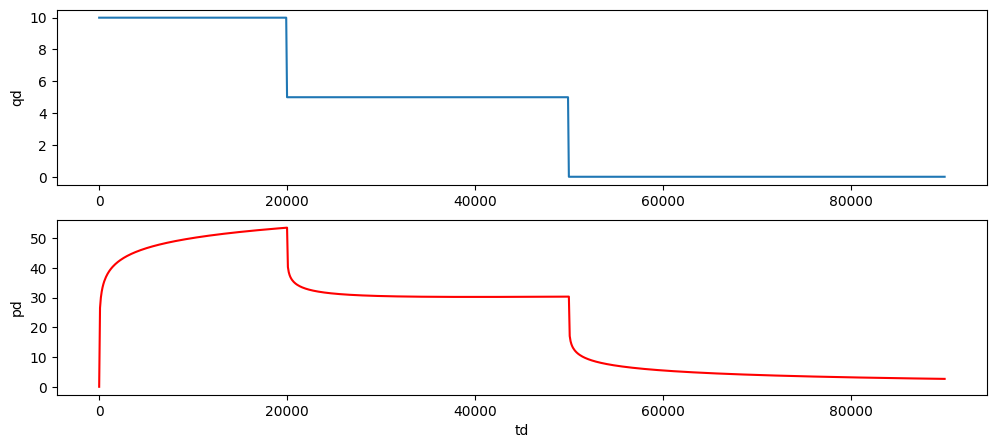

In [33]:
td_arr = np.linspace(1e-3, 9e4, 1000)
td_history = np.array([ 0., 2e4, 5e4 ], dtype=np.float64) 
qd_history = np.array([10., 5., 0.], dtype=np.float64)

plt.rcParams["figure.figsize"] = (12,5)
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(td_arr, 
         q_superposition(td_arr, td_history, qd_history)) 
ax2.plot(td_arr, 
         pd_superposition(td_arr, td_history, qd_history, rd=1), 
         color='red') 
ax2.set_xlabel('td')
ax1.set_ylabel('qd')
ax2.set_ylabel('pd')
plt.show()

In [34]:
def p_superposition_atma(t_hr, t_hist_hr, q_hist_sm3day,
                         k_mD=10, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250, 
                         phi=0.2, ct_1atm=1e-05, rw_m=0.1):
    """
    расчет давления для запуска и последующей остановки скважины
    t_hr - время после запуска в часах
    t_hist_hr - массив времен изменения режимов работы скважин
    q_hist_sm3day - массив дебитов установленных после изменения режима работы
    k_mD=10 - проницаемость, мД, 
    h_m=10 - мощность пласта, м, 
    b_m3m3=1.2 - объемный коэффициент, м3/м3, 
    mu_cP=1 - вязкость нефти, сП, 
    pi_atma=250 - начальное давление, атм, 
    phi=0.2 - пористость, доли единиц, 
    ct_1atm=1e-05 - общая сжимаемость, 1/атм, 
    rw_m=0.1 - радиус скважины
    """
    q_ref=1.
    td = td_from_t(t_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                                                     ct_1atm=ct_1atm, rw_m=rw_m)
    td_hist = td_from_t(t_hist_hr, k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                                                     ct_1atm=ct_1atm, rw_m=rw_m)
    return p_from_pd_atma(pd_superposition(td, td_hist, q_hist_sm3day / q_ref, 1), 
                          k_mD=10, h_m=10, 
                          q_sm3day=q_ref, b_m3m3=1.2, mu_cP=1, pi_atma=250)

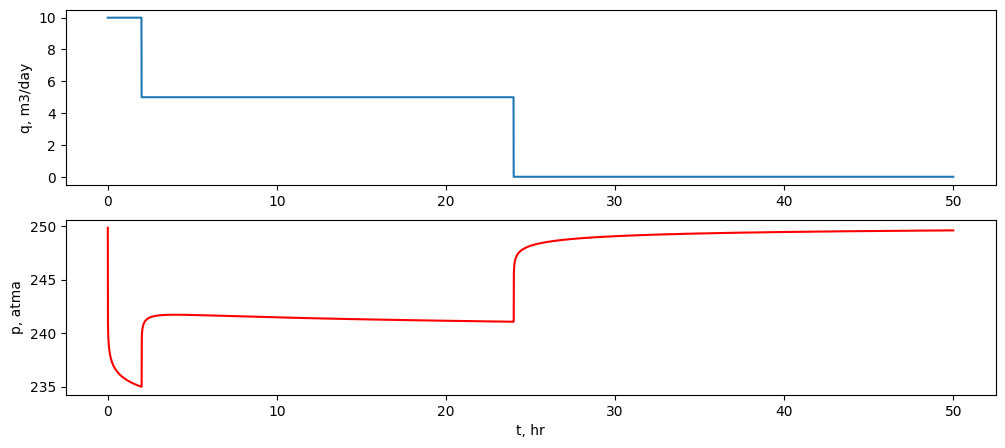

In [35]:
t_arr = np.arange(1e-6, 50, 1e-2)
plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax2.plot(t_arr, p_superposition_atma(t_arr, t_history, q_history), color='red') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
plt.show()

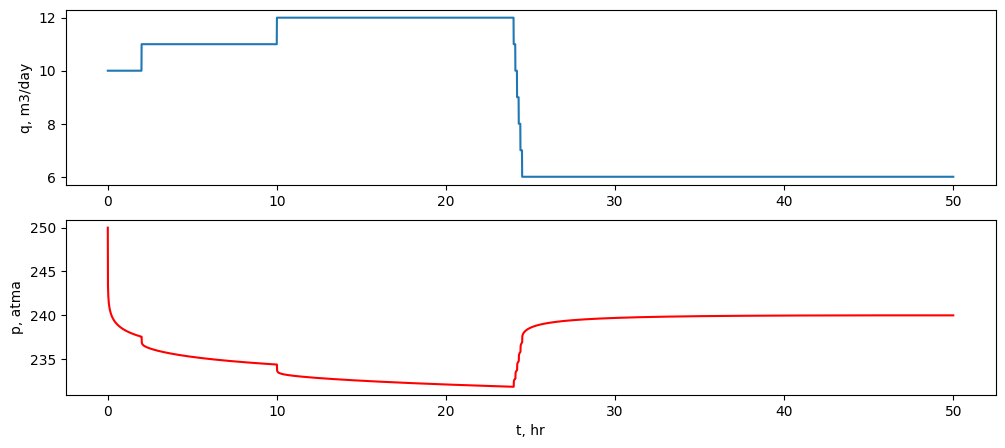

In [36]:
t_history = np.array([0, 2, 10, 24, 24.1,24.2,24.3,24.4,24.5 ])
q_history = np.array([10, 11, 12, 11, 10, 9, 8, 7, 6])

plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax2.plot(t_arr, p_superposition_atma(t_arr, t_history, q_history, 1), color='red') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
plt.show()

# Случай для произвольной истории дебитов (линейное изменение дебита) 

In [37]:
rd, td, qd = sp.symbols('r_D t_D q_D')
# запишем решение в символьном виде для постоянного дебита
eq = -qd/2 * sp.Ei(-rd **2 / 4 / td)
display(eq)

-q_D*Ei(-r_D**2/(4*t_D))/2

для линейно меняющегося дебита $dq_D t_D$ решение можно представить как интеграл

$$p_D = \int_0^{t_D}{- \frac{dq_D}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right) dt_D}$$

In [38]:
# проинтегрируем решение по времени
eq1 = sp.integrate(eq, td)
display(eq1)

-q_D*(r_D**2*Ei(-r_D**2/(4*t_D))/4 + t_D*Ei(-r_D**2/(4*t_D)) + t_D*exp(-r_D**2/(4*t_D)))/2



Для линейно меняющегося дебита во времени (как и для любой другой зависимости) надо решение проинтегрировать по времени (надо бы подробнее расписать - сделать это позже, например как у Щелкачева в основах нестационарной фильтрации на стр 321).

Для линейной зависимости дебита от времени 
$$Q_D = dQ_D \cdot t_D $$
можно получить выражение
$$p_D(r_D,t_D, dQ_D) =-\frac{dQ_D t_D }{2} \left[ \left( 1+ \frac{r_D^2}{4 t_D} \right) Ei \left(- \dfrac{r_D^2}{4t_D} \right) + e^{-\dfrac{r_D^2}{4t_D}} \right]$$ 

где $dQ_D$ - скорость изменения дебита.

Для таблично заданных дебитов и времен можно оценить 

$$dQ_{D(i)} = \dfrac{Q_{D(i)}-Q_{D(i-1)}}{t_{D(i)} - t_{D(i-1)} }$$

Cравните формулу (11) с формулой (9.68) в книге Щелкачева "Основы неустановившейся фильтрации"

Тогда, используя принцип суперпозиции, можем выписать выражение для изменения давления на скважине и вокруг нее для произвольного момента времени

$$P_{mr.D}(t_D, r_D) = \sum_i  p_D\left(t_D-t_{D(i)}, r_D, dQ_{D(i+1)} - dQ_{D(i)}\right)\cdot \mathcal{H}(t_D-t_{D(i)})$$

где

* $i$ - индекс значения дебита в таблице изменения дебитов

* $dQ_{D(i)}$ - изменение безразмерного дебита относительно безразмерного времени (14.4) 

* $t_{D(i)}$ - безразмерный момент времени - включения дебита с номером $i$

* $t_{D}$ - безразмерный момент времени для которого проводится расчет

* $\mathcal{H}$ - ступенчатая [функция Хевисайда](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0#:~:text=%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F%20%D0%A5%D0%B5%D0%B2%D0%B8%D1%81%D0%B0%D0%B9%D0%B4%D0%B0%20%D1%88%D0%B8%D1%80%D0%BE%D0%BA%D0%BE%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2,%D0%B4%D0%BB%D1%8F%20%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%B8%20%D1%8D%D0%BC%D0%BF%D0%B8%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9%20%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8%20%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F.)

* $p_D\left(t\right)$ - зависимость безразмерного давление от времени - решение задачи запуска скважины с постоянным единичным дебитом

* $P_{mr.D} $ - безразмерное давление $P_{mr.D}(t_D, r_D)$ учитывающее историю изменения дебитов скважины

следует обратить внимание, при суперпозиции скорость изменения дебита вычисляется как $dQ_{D(i+1)} - dQ_{D(i)}$.  при реализации расчета необходимо предусмотреть, чтобы для первого и последнего шага расчет прошел корректно. Для этого можно, например, добавить к массивам дебитов и времени дополнительный значения в начале и в конце массивов соответствующие постоянным значениям дебита. 

Также надо учитывать, что в приведенном выражении массивы должны начинаться со значений $Q_D=0$



In [39]:
# Решение линейного стока уравнения фильтрации
def pd_lin_ei(td, rd=1, dqd_dtd=1):
    """
    Решение линейного стока уравнения фильтрации
    rd - безразмерное расстояние
    td - безразмерное время
    """
    # при расчете убедимся, что td=0 не повлияет на расчет, 
    # даже если td массив и нулевой только один элемент
    td = np.array(td, dtype = float)
    pd =  (1 + rd**2/4/td) * (-sc.expi(-rd**2/4/td)) - np.exp(-rd**2/4/td)
    return dqd_dtd * td * pd / 2

In [40]:
def pd_superposition_lin(td, td_hist, qd_hist):
    """
    расчет безразмерного давления для последовательности 
    безразмерных дебитов
    - td -  время расчета после запуска, безразмерное
    - td_hist - массив времен изменения режимов работы, безразмерное
    - qd_hist - массив дебитов после изменения режима работы, безразмерное
    """
    # принудительно добавим нули во входные массивы, 
    # чтобы учесть запуск скважины
    qdh = np.hstack([qd_hist])
    tdh = np.hstack([td_hist])
    # построим дебиты виртуальных скважин 
    # разности реальных дебитов при переключении
    delta_qd = np.hstack([np.diff(qdh),0])
    delta_td = np.hstack([np.diff(tdh),1])
    
    dq_dt = delta_qd / delta_td
    dq_dt = np.diff(np.hstack([0, delta_qd / delta_td]))
    
    # референсный безразмерный дебит это 1
    
    # векторная магия - время как вектор и переключения дебитов тоже 
    # организуем сумму по временам, внутри сумма по переключениям
    # делаем при помощи расчета meshgrid и поиска накопленных сумм
    qd_v, td_v =np.meshgrid(delta_qd, td)
    
    dpd = np.cumsum(pd_lin_ei((td_v - tdh), 
                              dqd_dtd=dq_dt) * np.heaviside((td_v - tdh), 1),1 )

    return dpd[:,-1]

def p_superposition_lin_atma(t_hr, t_hist_hr, q_hist_sm3day,
                    k_mD=10, h_m=10, b_m3m3=1.2, mu_cP=1, pi_atma=250, 
                    phi=0.2, ct_1atm=1e-05, rw_m=0.1):
    """
    расчет давления для запуска и последующей остановки скважины
    t_hr - время после запуска в часах
    t_hist_hr - массив времен изменения режимов работы скважин
    q_hist_sm3day - массив дебитов установленных после изменения режима работы
    k_mD=10 - проницаемость, мД, 
    h_m=10 - мощность пласта, м, 
    b_m3m3=1.2 - объемный коэффициент, м3/м3, 
    mu_cP=1 - вязкость нефти, сП, 
    pi_atma=250 - начальное давление, атм, 
    phi=0.2 - пористость, доли единиц, 
    ct_1atm=1e-05 - общая сжимаемость, 1/атм, 
    rw_m=0.1 - радиус скважины
    """
    q_ref = 1.
    td = td_from_t(t_hr, 
                   k_mD=k_mD, phi=phi, mu_cP=mu_cP, ct_1atm=ct_1atm, rw_m=rw_m)
    td_hist = td_from_t(t_hist_hr, 
                        k_mD=k_mD, phi=phi, mu_cP=mu_cP, 
                        ct_1atm=ct_1atm, rw_m=rw_m)
    return p_from_pd_atma(pd_superposition_lin(td, td_hist, q_hist_sm3day / q_ref), 
                          k_mD=10, h_m=10, 
                          q_sm3day=q_ref, b_m3m3=1.2, mu_cP=1, pi_atma=250)


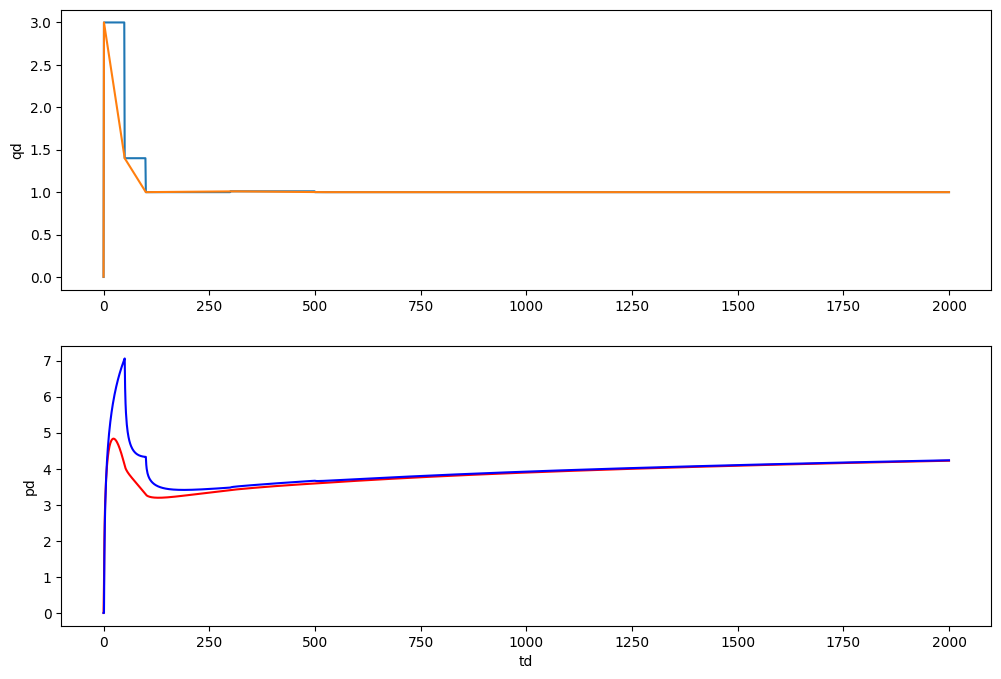

In [41]:
td_arr = np.linspace(1e-3, 2000, 2000)


td_history = np.array([0., 1, 50, 100, 300, 500 ], dtype=np.float64) 
qd_history = np.array([0., 3, 1.4, 1.0, 1.01, 1], dtype=np.float64)

plt.rcParams["figure.figsize"] = (12,8)
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(td_arr, q_superposition(td_arr, td_history, qd_history)) 
ax1.plot(td_arr, np.interp(td_arr, td_history, qd_history)) 
ax2.plot(td_arr, 
         pd_superposition_lin(td_arr, td_history, qd_history), 
         color='red') 
ax2.plot(td_arr, 
         pd_superposition(td_arr, td_history, qd_history, rd=1), 
         color='blue') 
ax2.set_xlabel('td')
ax1.set_ylabel('qd')
ax2.set_ylabel('pd')
plt.show()

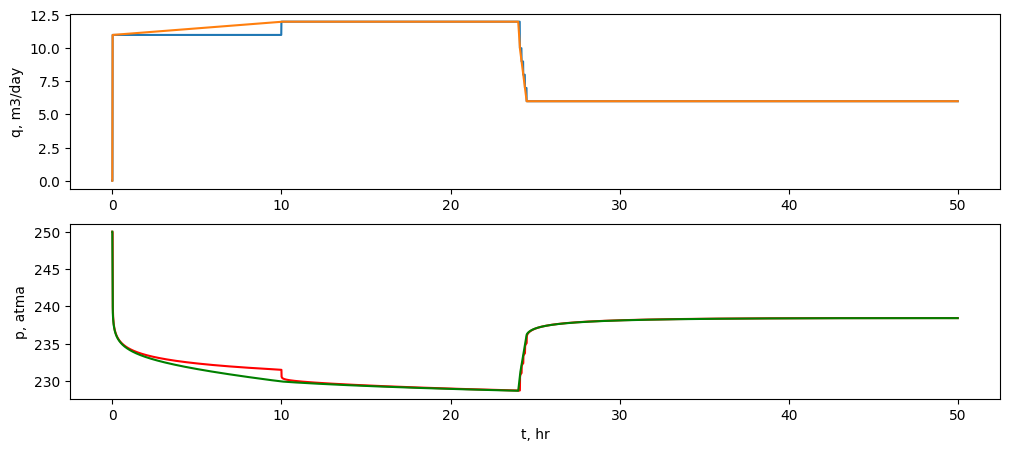

In [42]:
t_history = np.array([0, .02, 10, 24, 24.1,24.2,24.3,24.4,24.5 ])
q_history = np.array([0, 11, 12, 12, 10, 9, 8, 7, 6])

plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax1.plot(t_arr, np.interp(t_arr, t_history, q_history)) 
ax2.plot(t_arr, 
         p_superposition_atma(t_arr, t_history, q_history), 
         color='red') 
ax2.plot(t_arr, 
         p_superposition_lin_atma(t_arr, t_history, q_history), 
         color='green') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
plt.show()

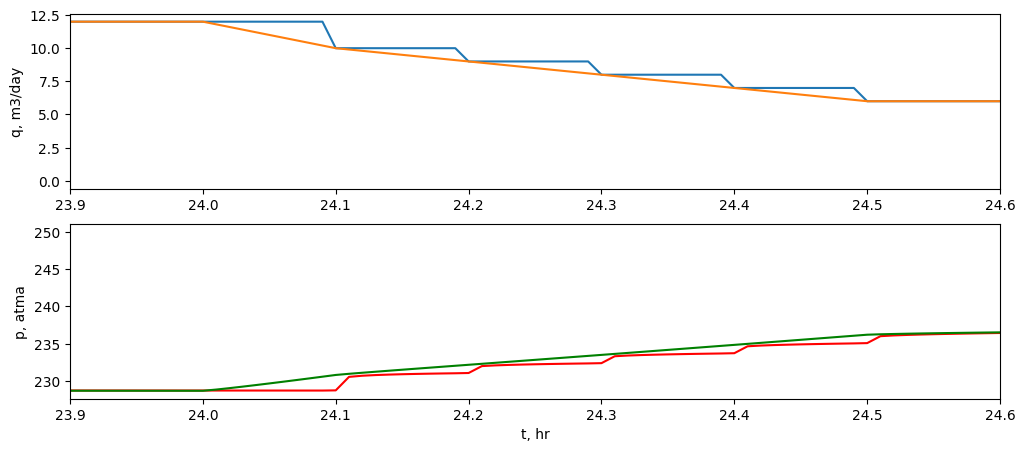

In [43]:
t_history = np.array([0, .02, 10, 24, 24.1,24.2,24.3,24.4,24.5 ])
q_history = np.array([0, 11, 12, 12, 10, 9, 8, 7, 6])

plt.rcParams["figure.figsize"] = (12,5)

fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t_arr, q_superposition(t_arr, t_history, q_history)) 
ax1.plot(t_arr, np.interp(t_arr, t_history, q_history)) 
ax2.plot(t_arr, 
         p_superposition_atma(t_arr, t_history, q_history), 
         color='red') 
ax2.plot(t_arr, 
         p_superposition_lin_atma(t_arr, t_history, q_history), 
         color='green') 
ax2.set_xlabel('t, hr')
ax1.set_ylabel('q, m3/day')
ax2.set_ylabel('p, atma')
ax1.set_xlim([23.9,24.6])
ax2.set_xlim([23.9,24.6])
plt.show()

## Задания для самостоятельной работы

Для совершенствования навыков работы с python выполните следующие задания:

1. Постройте решение для постоянного дебита. Аппрокимируйте получившуюся зависимость забойного давления от времени как кусочно линейную функцию и восстановите по ней дебиты используя решения для постоянного (или линейно меняющегося) дебита. Сравните получившееся решение с исходным.
2. Постройте решение для квадратично и кубично меняющегося дебита.
3. Построете решение для дебита изменяющегося как кубический сплайн.

# Радиус влияния скважины 


Нестационарное решение в безразмерных переменных
$$ 
p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)
$$
где безразмерные переменные введены как
$$ r_D = \frac{r}{r_w} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2} $$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p \right) $$

Здесь использование единицы измерения СИ.
* $r_w$ - радиус скважины, м

* $r$ - расстояние от центра скважины до точки в пласте, м

* $q_s$ - дебит скважины на поверхности, приведенный к нормальным условиям м3/сут

* $\phi$ - пористость, доли единиц

* $\mu$ - вязкость нефти в пласте, сП

* $B$ - объемный коэффициент нефти, м3/м3

* $p_i$ - начальное давление в пласте, атм

* $p$ - давление на расстоянии $r$, атм

* $c_t$ - общая сжимаемость системы в пласте, 1/атм

Для этих же безразмерных переменных, считая начальное давление равным давлению на контуре можно записать стационарное решение для движения в круговом пласте

$$p_D = \ln r_{eD} - \ln r_D $$

сравним это решение с логарифмической аппроксимацией (1)

$$p_D(r_D,t_D) = - \frac{q_D}{2} \left[ \ln \left( \dfrac{ r_D^2}{4t_d} \right) +\gamma \right]$$

которое можно преобразовать к виду
$$p_D(r_D,t_D) = - q_D \ln r_D  + \frac{q_D}{2} \left[ \ln(4t_D)   -\gamma \right]$$

сравнивая со стационарным решением можно найти выражение безразмерного радиуса контура в зависимости от безразмерного времени
$$\ln r_{eD} = \frac{1}{2}(\ln(4t_D)-\gamma) $$

$$r_{eD} =  \sqrt { 4t_D e^{-\gamma} } $$

In [44]:
# оценим значение величины под корнем
print(4*np.exp(-0.57721566481))

2.2458379344731085


наконец получим
$$r_{eD} = \sqrt {2.2458 t_D}$$

это значение называют радиусом влияния скважины. Используя это значение для определенного момента времени можно получить стационарное распределение давления в системе хорошо приближающее решение линейного стока работающего в бесконечном пласте. Можно считать это расстояние за расстояние на которое распространяется влияние скважины.

достижение радиуса влияния внешних границ будет обуславливать начало перехода от неустановившегося режима фильтрации к режиму обусловленному влиянием границ - стационарному для границы постоянного давления или псевдоустановившемуся для границы непротекания.

In [49]:
# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd):
    """
    Решение линейного стока уравнения фильтрации
    - rd - безразмерное расстояние
    - td - безразмерное время
    """
    return -1/2*sc.expi(-rd**2 / 4 / td)


def pd_ss(rd, red):
    """
    стационарное решение в безразмерных переменных
    - rd - безразмерное расстояние
    - red - безразмерное расстояние до границы
    """
    return np.log(red/rd)

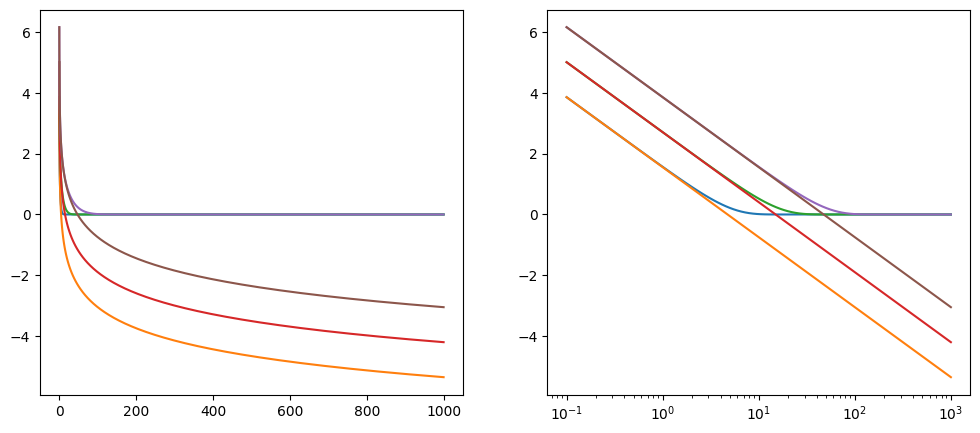

In [50]:
# зададим точки расстояний для отрисовки графика
rdl = np.logspace(-1, 3 , 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12,5])
# построим первый график в обычных координатах
for td in [10, 100, 1000]:
    ax1.plot(rdl, pd_ei(td, rdl))
    
    red = (td*2.2458)**0.5
    ax1.plot(rdl, pd_ss(rdl, red))

# построим второй график в полулогарифмических координатах
for td in [10, 100, 1000]:
    ax2.plot(rdl, pd_ei(td, rdl))
    
    red = (td*2.2458)**0.5
    ax2.plot(rdl, pd_ss(rdl, red))
plt.xscale('log')
plt.show()

# Список литературы

1. Kappa. Dynamic Data Analysis. The theory and practice of pressure transient, production analysis, well performance analysis, production logging and the use of permanent downhole gauge data. v4.12.02 Olivier Houze, Didier Viturat, Ole S. Fjare (et al)

2. Щелкачев В.Н. Основы и приложения теории неустановившейся фильтрации. М.: Нефть и газ, 1995 ч.1